B.P - Predict delivery time using sorting time 


In [1]:
# Importing Librariess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("dt.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
# Renaming columns
data1 = data.rename({'Sorting Time' : 'ST'},axis=1)
data1 = data1.rename({'Delivery Time' : 'DT'},axis=1)

In [6]:
# Finding correlation between x and y variable
cor = np.corrcoef(data1.DT,data1.ST)
cor

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

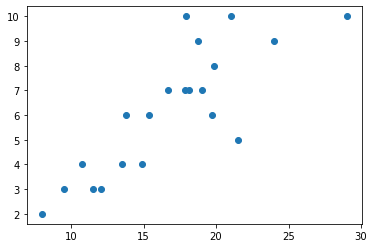

In [7]:
# Plotting data
plt.scatter(data1.DT,data1.ST)

In [18]:
!pip install ml_metrics

  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7848 sha256=0a113825606914f44e543e3730ffd4982f09e9571502b3279d4a181e89acad7d
  Stored in directory: c:\users\abdhi\appdata\local\pip\cache\wheels\09\2d\e7\58a96e635aedc543a3a78ff855dc9911d98fc1640e3921c823
Successfully built ml-metrics


In [19]:
# Model building - Linear Regression
import statsmodels.formula.api as smf
from ml_metrics import mse

In [14]:
ols = smf.ols(('data1.ST~data1.DT'),data=data1).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               data1.ST   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 19 May 2021   Prob (F-statistic):           3.98e-06
Time:                        11:44:24   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
data1.DT       0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
ypred = ols.predict(data1.DT)
ypred

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [26]:
# Evaluating using RMSE
err = np.sqrt(np.mean((data1.DT-ypred)**2))
err

10.990921514737984

In [32]:
# Linear regression using sklearn
from sklearn.linear_model import LinearRegression

In [42]:
x = data.iloc[:,:-1].values
y = data.iloc[:,:1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=1/3,random_state=0)

In [54]:
reg = LinearRegression().fit(x_train,y_train)

In [55]:
ypred = reg.predict(x_train)
ypred

array([[18.75],
       [ 9.5 ],
       [18.11],
       [24.  ],
       [21.  ],
       [14.88],
       [16.68]])

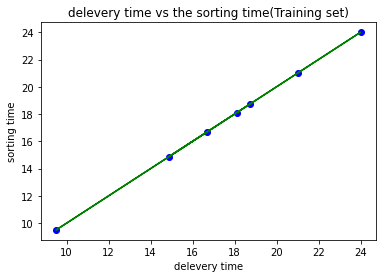

In [60]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,ypred,color='green')
plt.title('delevery time vs the sorting time(Training set)')
plt.xlabel("delevery time")
plt.ylabel("sorting time")
plt.show()

In [59]:
err = np.sqrt(np.mean((x_train-ypred)**2))
err

1.5012955407352219e-15